Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
[[[-1.60318744  0.79689831 -0.51877993 -0.86038554  2.2135725   0.92814732
   -0.1207154   0.52957332  1.26717091  0.74042624  1.1152631   0.94519448
    0.94670141 -1.15527844 -1.27713454 -0.55219221  0.37697944  1.73947072
    0.12747173 -0.41173148 -0.43149576  0.7991994  -0.30614656  1.31084931
    2.05543184  0.34835777  1.17222178  0.86478609 -1.10735345  1.47406101
   -1.39648926  0.82632148]]

 [[ 1.16901243  2.46525478  0.26738811  0.75674278 -0.30456838  0.10160126
   -0.57598805  0.80244243  0.54735208  0.34791791 -0.06597187  1.23796713
   -0.09588797  2.46687818 -0.2945838   0.23021907  1.38335419 -1.0364511
    1.30915701  0.47871771  1.16624427  0.80019903  1.03538907  1.03598952
   -1.24295056  0.91481757 -0.09015419  0.32274142 -0.57286757  1.76696908
   -0.99792647  0.85960406]]

 

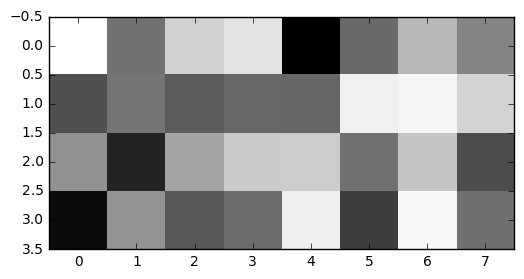

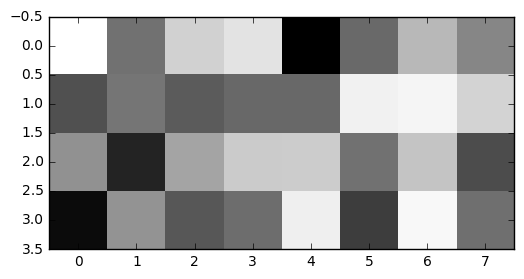

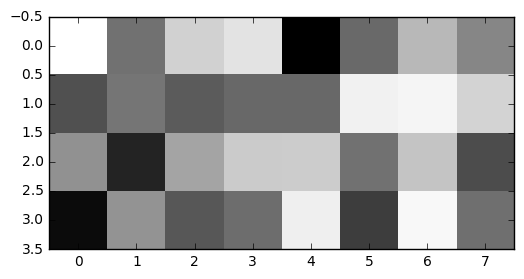

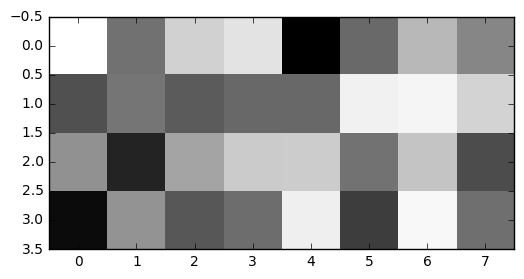

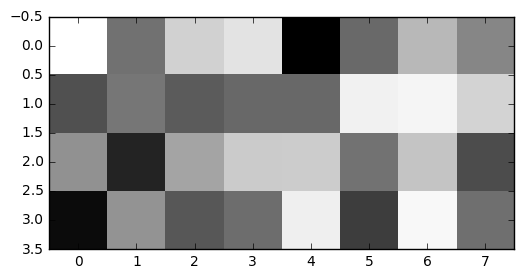

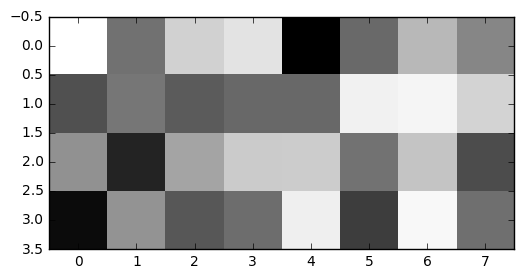

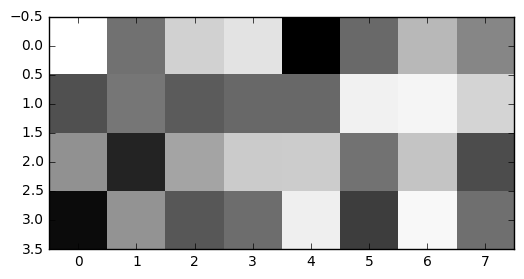

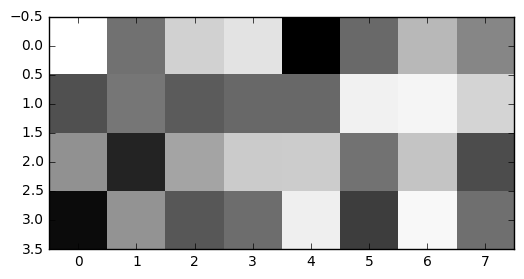

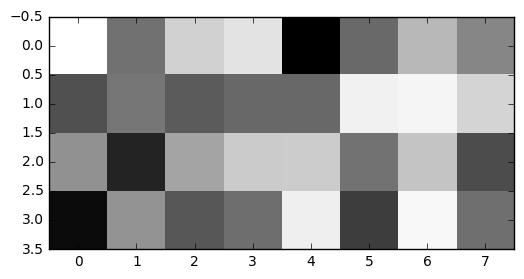

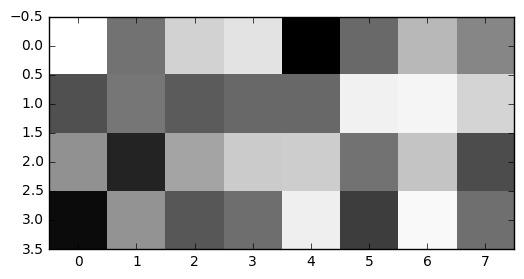

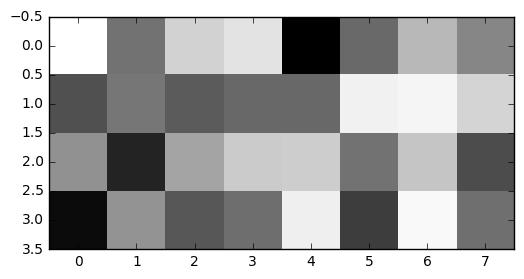

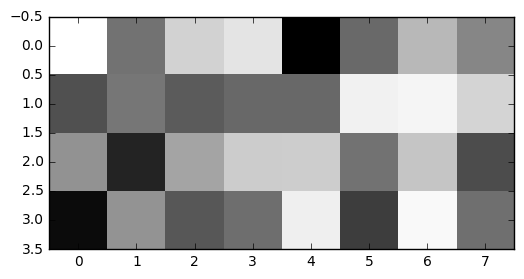

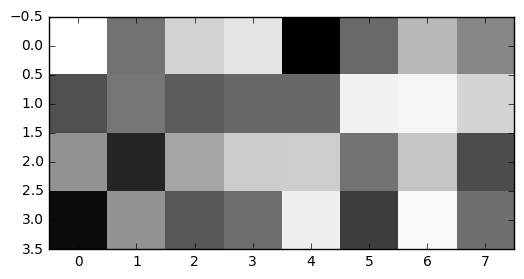

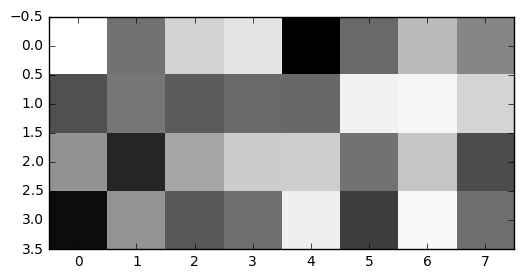

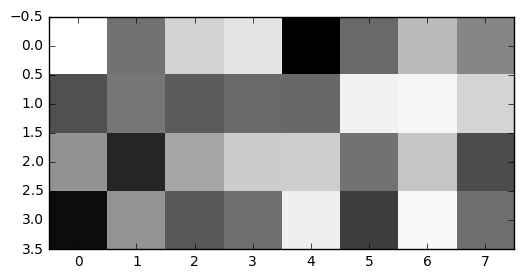

In [11]:
import tensorflow as tf 
%matplotlib inline 
import matplotlib.pyplot as plt  
# Import MINST data 
from tensorflow.examples.tutorials.mnist import input_data 
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True) 
# Parameters 
learning_rate = 0.001 
training_iters = 2000 
batch_size = 128 
display_step = 10 
 
# Network Parameters 
n_input = 784 # MNIST data input (img shape: 28*28) 
n_classes = 10 # MNIST total classes (0-9 digits) 
dropout = 0.75 # Dropout, probability to keep units 
 
# tf Graph input 
x = tf.placeholder(tf.float32, [None, n_input]) 
y = tf.placeholder(tf.float32, [None, n_classes]) 
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability) 
 
#plt.imshow(X_train[1202].reshape((20, 20), order='F'), cmap='Greys',  interpolation='nearest') 
 
# Create some wrappers for simplicity 
def conv2d(x, W, b, strides=1): 
    # Conv2D wrapper, with bias and relu activation 
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME') 
    x = tf.nn.bias_add(x, b) 
    return tf.nn.relu(x) 
def maxpool2d(x, k=2): 
    # MaxPool2D wrapper 
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], 
                          padding='SAME') 
# Create model 
def conv_net(x, weights, biases, dropout): 
    # Reshape input picture 
    x = tf.reshape(x, shape=[-1, 28, 28, 1]) 
 
    # Convolution Layer 
    conv1 = conv2d(x, weights['wc1'], biases['bc1']) 
    # Max Pooling (down-sampling) 
    conv1 = maxpool2d(conv1, k=2) 
 
    # Convolution Layer 
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2']) 
    # Max Pooling (down-sampling) 
    conv2 = maxpool2d(conv2, k=2) 
 
    # Fully connected layer 
    # Reshape conv2 output to fit fully connected layer input 
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]]) 
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1']) 
    fc1 = tf.nn.relu(fc1) 
    # Apply Dropout 
    fc1 = tf.nn.dropout(fc1, dropout) 
 
    # Output, class prediction 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out']) 
    return out 

# Store layers weight & bias 
weights = { 
# 5x5 conv, 1 input, 32 outputs 
'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])), 
# 5x5 conv, 32 inputs, 64 outputs 
'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])), 
# fully connected, 7*7*64 inputs, 1024 outputs 
'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])), 
# 1024 inputs, 10 outputs (class prediction) 
'out': tf.Variable(tf.random_normal([1024, n_classes])) 
} 
 
biases = { 
'bc1': tf.Variable(tf.random_normal([32])), 
'bc2': tf.Variable(tf.random_normal([64])), 
'bd1': tf.Variable(tf.random_normal([1024])), 
'out': tf.Variable(tf.random_normal([n_classes])) 
} 
 
# Construct model 
pred = conv_net(x, weights, biases, keep_prob) 
 
# Define loss and optimizer 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y)) 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) 
 
# Evaluate model 
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32)) 
 
# Initializing the variables 
init = tf.initialize_all_variables() 
 
# Launch the graph 
with tf.Session() as sess: 
    sess.run(init) 
    step = 1 
    # Keep training until reach max iterations 
    while step * batch_size < training_iters: 
        batch_x, batch_y = mnist.train.next_batch(batch_size) 
        test = batch_x[0] 
        fig = plt.figure() 
        plt.imshow(test.reshape((28, 28), order='C'), cmap='Greys', 
        interpolation='nearest') 
        print(weights['wc1'].eval()[0]) 
        plt.imshow(weights['wc1'].eval()[0][0].reshape(4, 8), cmap='Greys',  interpolation='nearest') 
        # Run optimization op (backprop) 
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, 
                                       keep_prob: dropout}) 
        if step % display_step == 0: 
            # Calculate batch loss and accuracy 
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x, 
                                                              y: batch_y, 
                                                            keep_prob: 1.})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + str(loss) + ", Training Accuracy= " + str(acc)) 
        step += 1 
    print("Optimization Finished!")
 
    # Calculate accuracy for 256 mnist test images 
    print("Testing Accuracy:" + str(sess.run(accuracy, feed_dict={x: mnist.test.images[:256],y: mnist.test.labels[:256],keep_prob: 1.}) ) ) 

### Case 2

7
CPU times: user 19min 54s, sys: 3min 19s, total: 23min 14s
Wall time: 9min 14s
CPU times: user 24.1 s, sys: 2.4 s, total: 26.5 s
Wall time: 11.2 s


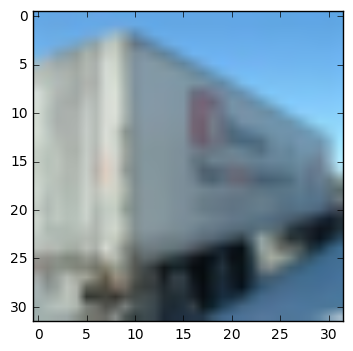

In [13]:
import glob 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.contrib.learn as skflow 
from sklearn import metrics 
from tensorflow.contrib import learn 
 
datadir='data/cifar-10-batches-bin/' 
 
plt.ion() 
G = glob.glob (datadir + '*.bin') 
A = np.fromfile(G[0],dtype=np.uint8).reshape([10000,3073]) 
labels = A [:,0] 
images = A [:,1:].reshape([10000,3,32,32]).transpose (0,2,3,1) 
plt.imshow(images[15]) 
print(labels[11])
images_unroll = A [:,1:] 
def max_pool_2x2(tensor_in): 
    return tf.nn.max_pool(tensor_in,  ksize= [1,2,2,1], strides= [1,2,2,1], padding='SAME') 
 
def conv_model (X, y): 
    X= tf.reshape(X, [-1, 32, 32, 3]) 
    with tf.variable_scope('conv_layer1'): 
        h_conv1=tf.contrib.layers.conv2d(X, num_outputs=16,  kernel_size=[5,5],  activation_fn=tf.nn.relu)#print (h_conv1) 
        h_pool1=max_pool_2x2(h_conv1)#print (h_pool1) 
    with tf.variable_scope('conv_layer2'): 
        h_conv2=tf.contrib.layers.conv2d(h_pool1, num_outputs=16, kernel_size=[5,5], activation_fn=tf.nn.relu) 
    #print (h_conv2) 
    h_pool2=max_pool_2x2(h_conv2) 
    h_pool2_flat = tf.reshape(h_pool2,  [-1,8*8*16 ]) 
    h_fc1 = tf.contrib.layers.stack(h_pool2_flat, tf.contrib.layers.fully_connected ,[96,48], activation_fn=tf.nn.relu ) 
    return skflow.models.logistic_regression(h_fc1,y) 
 
images = np.array(images,dtype=np.float32) 
classifier = skflow.TensorFlowEstimator(model_fn=conv_model, n_classes=10, batch_size=100, steps=2000, learning_rate=0.01) 
 
%time classifier.fit(images, labels, logdir='/tmp/cnn_train/') 
%time score =metrics.accuracy_score(labels, classifier.predict(images)) 